In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.optimizers import SGD

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:

# Hyperparameters
batch_size = 64
num_classes = 10 #pegar automaticamente NumPy.Unique
epochs = 200



In [3]:
# Load Cifar-10 Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Adicionando Canal do DataSet (Channel do MNIST eh 1)
x_train = np.reshape(x_train, (len(x_train),28,28, 1))
x_test = np.reshape(x_test, (len(x_test),28,28, 1))


#x_train.shape
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#channel=1

x_train.shape



(60000, 28, 28, 1)

In [4]:

#
x_train.shape

#


(60000, 28, 28, 1)

In [5]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
img_width

28

In [7]:
model = Sequential()

#Filters = IMG_width/2 * 7
model.add(Conv2D(98, #alterado de 168 para 98
                 (5,5), #alterado de 3 para 5 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))

#Normalization:
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))

#Filters = IMG_width/2 * 9
model.add(Conv2D(126, 
                 (5,5), 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#Normalization:
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))

model.add(Flatten())
#IMG_width^ 2
model.add(Dense(784, activation='relu'))
model.add(Dropout(0.5))

#camada anterior/2
model.add(Dense(392, activation='relu'))
model.add(Dropout(0.5))

#Num de classes
model.add(Dense(10, activation='softmax'))


In [8]:

# print the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 98)        2548      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 98)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 49)          4851      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 126)         154476    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 126)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 49)          6223      
_________________________________________________________________
flatten_1 (Flatten)          (None, 196)               0         
__________

In [9]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.02, decay=0.0, nesterov=False),
              metrics=['accuracy'])


In [10]:

# Train the Model
#earlyStopping=keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=13, verbose=1, mode='auto')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
#                    callbacks=[earlyStopping],
                    validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 31s 516us/step - loss: 0.5438 - acc: 0.8192 - val_loss: 0.1017 - val_acc: 0.9678
Epoch 2/200
60000/60000 [==============================] - 30s 505us/step - loss: 0.1276 - acc: 0.9622 - val_loss: 0.0841 - val_acc: 0.9738
Epoch 3/200
60000/60000 [==============================] - 30s 506us/step - loss: 0.0904 - acc: 0.9736 - val_loss: 0.0488 - val_acc: 0.9841
Epoch 4/200
60000/60000 [==============================] - 31s 509us/step - loss: 0.0714 - acc: 0.9787 - val_loss: 0.0556 - val_acc: 0.9826
Epoch 5/200
60000/60000 [==============================] - 30s 507us/step - loss: 0.0617 - acc: 0.9825 - val_loss: 0.0472 - val_acc: 0.9847
Epoch 6/200
60000/60000 [==============================] - 30s 500us/step - loss: 0.0500 - acc: 0.9854 - val_loss: 0.0357 - val_acc: 0.9887
Epoch 7/200
60000/60000 [==============================] - 30s 506us/step - loss: 0.0425 - acc: 0.9874 - val_l

Epoch 59/200
60000/60000 [==============================] - 31s 517us/step - loss: 0.0024 - acc: 0.9990 - val_loss: 0.0530 - val_acc: 0.9913
Epoch 60/200
60000/60000 [==============================] - 31s 515us/step - loss: 0.0014 - acc: 0.9997 - val_loss: 0.0547 - val_acc: 0.9905
Epoch 61/200
60000/60000 [==============================] - 31s 518us/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0560 - val_acc: 0.9899
Epoch 62/200
60000/60000 [==============================] - 31s 522us/step - loss: 0.0024 - acc: 0.9992 - val_loss: 0.0507 - val_acc: 0.9906
Epoch 63/200
60000/60000 [==============================] - 31s 522us/step - loss: 0.0032 - acc: 0.9989 - val_loss: 0.0550 - val_acc: 0.9905
Epoch 64/200
60000/60000 [==============================] - 31s 520us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0479 - val_acc: 0.9920
Epoch 65/200
60000/60000 [==============================] - 31s 519us/step - loss: 0.0037 - acc: 0.9989 - val_loss: 0.0572 - val_acc: 0.9896
Epoch 66/200


60000/60000 [==============================] - 30s 507us/step - loss: 6.9058e-04 - acc: 0.9998 - val_loss: 0.0605 - val_acc: 0.9905
Epoch 117/200
60000/60000 [==============================] - 31s 512us/step - loss: 8.4804e-04 - acc: 0.9997 - val_loss: 0.0625 - val_acc: 0.9909
Epoch 118/200
60000/60000 [==============================] - 31s 511us/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0581 - val_acc: 0.9918
Epoch 119/200
60000/60000 [==============================] - 31s 512us/step - loss: 0.0011 - acc: 0.9996 - val_loss: 0.0576 - val_acc: 0.9912
Epoch 120/200
60000/60000 [==============================] - 31s 511us/step - loss: 5.2593e-04 - acc: 0.9999 - val_loss: 0.0625 - val_acc: 0.9902
Epoch 121/200
60000/60000 [==============================] - 31s 511us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0633 - val_acc: 0.9910
Epoch 122/200
60000/60000 [==============================] - 31s 511us/step - loss: 5.6715e-04 - acc: 0.9998 - val_loss: 0.0610 - val_acc: 0.9907
Epoc

Epoch 173/200
60000/60000 [==============================] - 31s 521us/step - loss: 1.1079e-04 - acc: 0.9999 - val_loss: 0.0588 - val_acc: 0.9919
Epoch 174/200
60000/60000 [==============================] - 31s 523us/step - loss: 0.0013 - acc: 0.9997 - val_loss: 0.0586 - val_acc: 0.9918
Epoch 175/200
60000/60000 [==============================] - 31s 515us/step - loss: 0.0014 - acc: 0.9996 - val_loss: 0.4404 - val_acc: 0.9496
Epoch 176/200
60000/60000 [==============================] - 31s 518us/step - loss: 0.0046 - acc: 0.9990 - val_loss: 0.0650 - val_acc: 0.9912
Epoch 177/200
60000/60000 [==============================] - 31s 518us/step - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0636 - val_acc: 0.9912
Epoch 178/200
60000/60000 [==============================] - 31s 517us/step - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0656 - val_acc: 0.9912
Epoch 179/200
60000/60000 [==============================] - 31s 516us/step - loss: 0.0024 - acc: 0.9995 - val_loss: 0.0764 - val_acc: 0.9896
Ep

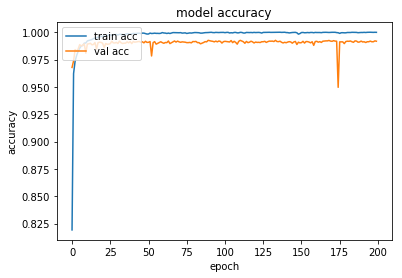

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','val acc'], loc='upper left')
plt.show()

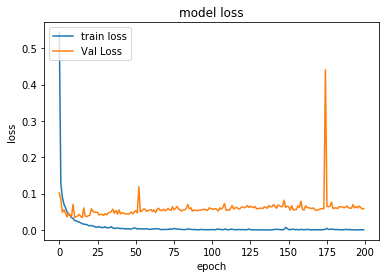

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','Val Loss'], loc='upper left')
plt.show()

In [13]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0588802552154
Test accuracy: 0.9918


In [14]:
print(history.history)

{'val_loss': [0.10173759820573032, 0.084100043336115773, 0.048843465937220026, 0.055609152854670538, 0.047185995696723694, 0.035697691349469825, 0.046504161109395502, 0.0406070694005728, 0.037878331113580861, 0.070310696540493517, 0.035106826265363995, 0.036464890112542343, 0.038691531760650107, 0.042856675523208286, 0.037535200946382248, 0.033596337697819396, 0.060641409837639368, 0.037883418480197724, 0.036863048612324562, 0.039037304953067904, 0.040806612061765737, 0.058350361374266232, 0.051510360174636116, 0.048302875948264865, 0.048782829733780363, 0.047985618490732213, 0.041062030742525346, 0.043067424056367966, 0.042445941299514837, 0.039838307174450076, 0.045096866009267884, 0.04125536934018173, 0.046963663046083091, 0.04818236297764706, 0.050944088683698464, 0.057025073200756109, 0.045887092227618269, 0.053387860916782666, 0.043619141398722604, 0.055286192940165076, 0.043929652127122062, 0.04733642927331539, 0.045685284162498917, 0.044283583947374271, 0.044582860738804173, 0.